In [1]:
import polars as pl

# 读取数据
data = pl.read_parquet("hourly_data.pa")

df = data.sort('open_time').sort("symbol")

window_size = 20
a = 0.015

df = df.with_columns([
    ((pl.col('high') + pl.col('low') + pl.col('close')) / 3).alias('TP'),
    (pl.col('close') / (pl.col('close').shift(1).over('symbol')) - 1).alias('return')
])

df

open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,symbol,TP,return
datetime[μs],f64,f64,f64,f64,f64,datetime[μs],f64,i64,f64,f64,str,f64,f64
2022-09-09 13:00:00,0.4728,0.4874,0.3663,0.451,6.5705837e7,2022-09-09 13:59:59.999,2.8487e7,124200,3.3701922e7,1.4632e7,"""1000LUNCUSDT""",0.4349,null
2022-09-09 14:00:00,0.451,0.4609,0.4277,0.4592,4.1316126e7,2022-09-09 14:59:59.999,1.8355e7,94104,2.0298138e7,9.0220e6,"""1000LUNCUSDT""",0.449267,0.018182
2022-09-09 15:00:00,0.4594,0.4734,0.4416,0.4555,4.4134479e7,2022-09-09 15:59:59.999,2.0198e7,103417,2.2353913e7,1.0239e7,"""1000LUNCUSDT""",0.456833,-0.008057
2022-09-09 16:00:00,0.4554,0.458,0.4175,0.4297,4.6242265e7,2022-09-09 16:59:59.999,2.0187e7,84951,2.1467246e7,9.3760e6,"""1000LUNCUSDT""",0.435067,-0.056641
2022-09-09 17:00:00,0.4297,0.4418,0.4071,0.4156,2.661109e7,2022-09-09 17:59:59.999,1.1376e7,50896,1.2655405e7,5.4132e6,"""1000LUNCUSDT""",0.4215,-0.032814
…,…,…,…,…,…,…,…,…,…,…,…,…,…
2022-12-31 19:00:00,0.1494,0.1498,0.1494,0.1496,748908.5,2022-12-31 19:59:59.999,112011.25443,882,481198.1,71987.20389,"""ZRXUSDT""",0.1496,0.001339
2022-12-31 20:00:00,0.1496,0.1497,0.1494,0.1496,501195.0,2022-12-31 20:59:59.999,74979.34106,751,282290.8,42242.69096,"""ZRXUSDT""",0.149567,0.0
2022-12-31 21:00:00,0.1496,0.1497,0.149,0.149,413737.4,2022-12-31 21:59:59.999,61817.02306,583,132775.7,19839.82814,"""ZRXUSDT""",0.149233,-0.004011


In [2]:
# 计算TP的移动平均

df = df.with_columns([
    pl.col('TP').rolling_mean(window_size).over('symbol').alias('TP_MA')
])

df

open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,symbol,TP,return,TP_MA
datetime[μs],f64,f64,f64,f64,f64,datetime[μs],f64,i64,f64,f64,str,f64,f64,f64
2022-09-09 13:00:00,0.4728,0.4874,0.3663,0.451,6.5705837e7,2022-09-09 13:59:59.999,2.8487e7,124200,3.3701922e7,1.4632e7,"""1000LUNCUSDT""",0.4349,null,null
2022-09-09 14:00:00,0.451,0.4609,0.4277,0.4592,4.1316126e7,2022-09-09 14:59:59.999,1.8355e7,94104,2.0298138e7,9.0220e6,"""1000LUNCUSDT""",0.449267,0.018182,null
2022-09-09 15:00:00,0.4594,0.4734,0.4416,0.4555,4.4134479e7,2022-09-09 15:59:59.999,2.0198e7,103417,2.2353913e7,1.0239e7,"""1000LUNCUSDT""",0.456833,-0.008057,null
2022-09-09 16:00:00,0.4554,0.458,0.4175,0.4297,4.6242265e7,2022-09-09 16:59:59.999,2.0187e7,84951,2.1467246e7,9.3760e6,"""1000LUNCUSDT""",0.435067,-0.056641,null
2022-09-09 17:00:00,0.4297,0.4418,0.4071,0.4156,2.661109e7,2022-09-09 17:59:59.999,1.1376e7,50896,1.2655405e7,5.4132e6,"""1000LUNCUSDT""",0.4215,-0.032814,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2022-12-31 19:00:00,0.1494,0.1498,0.1494,0.1496,748908.5,2022-12-31 19:59:59.999,112011.25443,882,481198.1,71987.20389,"""ZRXUSDT""",0.1496,0.001339,0.15035
2022-12-31 20:00:00,0.1496,0.1497,0.1494,0.1496,501195.0,2022-12-31 20:59:59.999,74979.34106,751,282290.8,42242.69096,"""ZRXUSDT""",0.149567,0.0,0.150393
2022-12-31 21:00:00,0.1496,0.1497,0.149,0.149,413737.4,2022-12-31 21:59:59.999,61817.02306,583,132775.7,19839.82814,"""ZRXUSDT""",0.149233,-0.004011,0.150372


In [3]:
# 定义计算 mean_dev 的函数
def calculate_mean_dev(tp):
    matp = tp.mean()  # 当前窗口的 MATP
    mean_dev = (tp - matp).abs().mean()
    return mean_dev

# 使用 rolling_apply 来计算 mean_dev
df = df.with_columns([
    pl.col("TP").rolling_apply(
        function=calculate_mean_dev,
        window_size=window_size,
        weights=None
    ).over("symbol").alias("mean_dev")
])

/var/folders/8p/_lylf4tn2yz39y4qkw9vg1jw0000gn/T/ipykernel_20493/3730253047.py:9: DeprecationWarning: `rolling_apply` is deprecated. It has been renamed to `rolling_map`.
  pl.col("TP").rolling_apply(


In [4]:
# 计算 rolling_mean
df = df.with_columns([
    pl.col("TP").rolling_mean(window_size).over("symbol").alias("MATP")
])

# 计算 CCI 因子值
df = df.with_columns([
    ((pl.col("TP") - pl.col("MATP")) / (a * pl.col("mean_dev"))).alias("CCI")
])

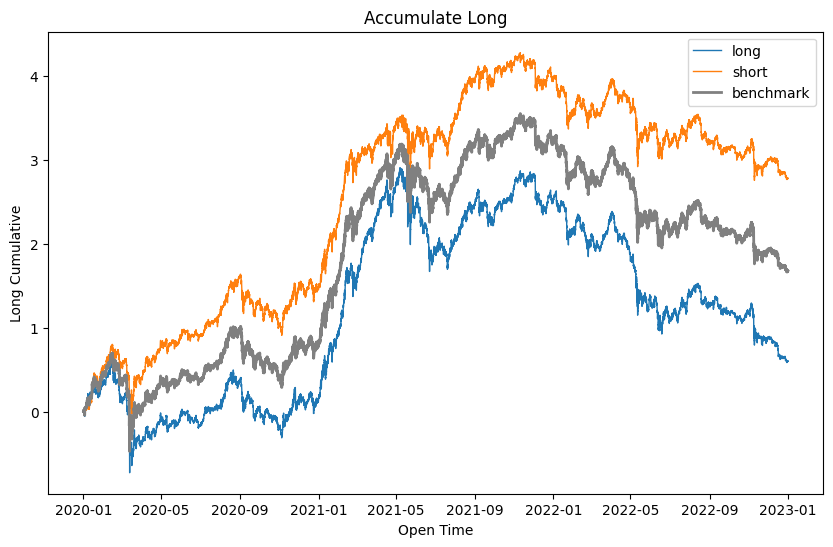

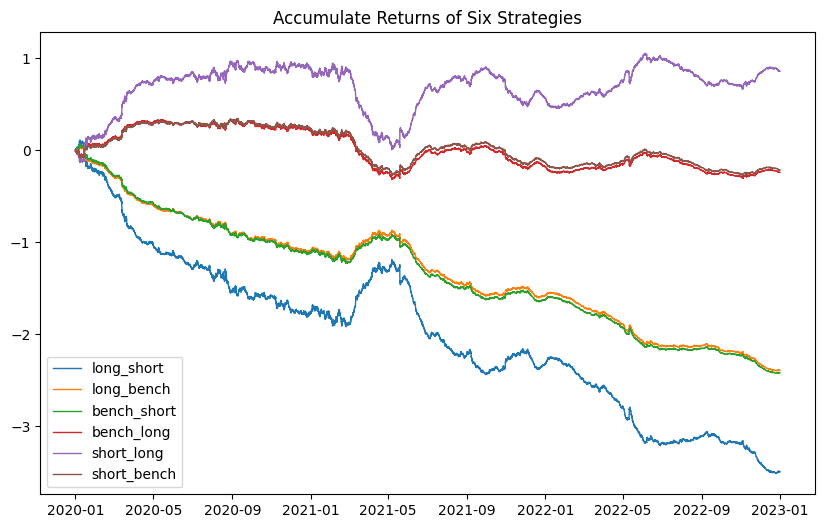

long: 
ann_return = 0.1993  sharpe = 0.1809  maxdd = 0.8273  calmar_ratio = 0.2409  

short: 
ann_return = 0.9246  sharpe = 0.8457  maxdd = 0.5755  calmar_ratio = 1.6066  

bench: 
ann_return = 0.5575  sharpe = 0.513  maxdd = 0.6895  calmar_ratio = 0.8085  

long_short: 
ann_return = -1.1632  sharpe = -3.7713  maxdd = 3.2541  calmar_ratio = -0.3575  

long_bench: 
ann_return = -0.7962  sharpe = -5.0858  maxdd = 2.3405  calmar_ratio = -0.3402  

bench_long: 
ann_return = -0.0798  sharpe = -0.5098  maxdd = 0.4885  calmar_ratio = -0.1634  

short_long: 
ann_return = 0.2872  sharpe = 0.9312  maxdd = 0.4915  calmar_ratio = 0.5844  

short_bench: 
ann_return = -0.071  sharpe = -0.4559  maxdd = 0.4604  calmar_ratio = -0.1541  

bench_short: 
ann_return = -0.805  sharpe = -5.1709  maxdd = 2.3369  calmar_ratio = -0.3445  



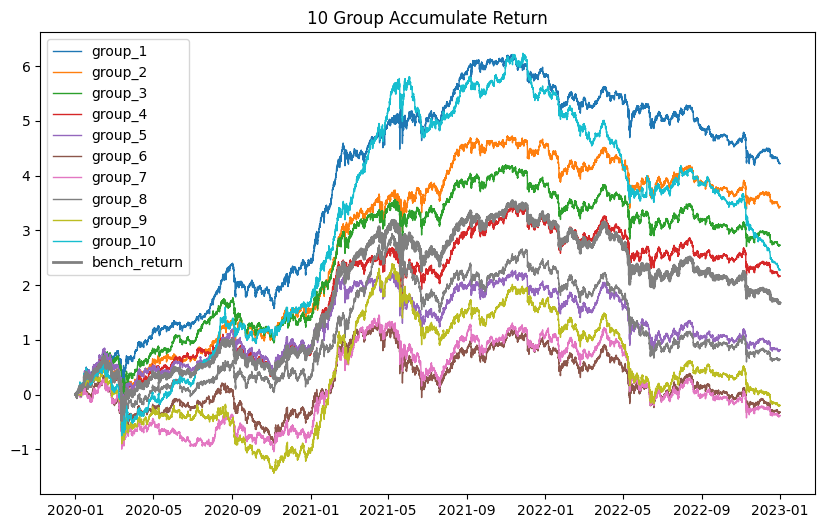

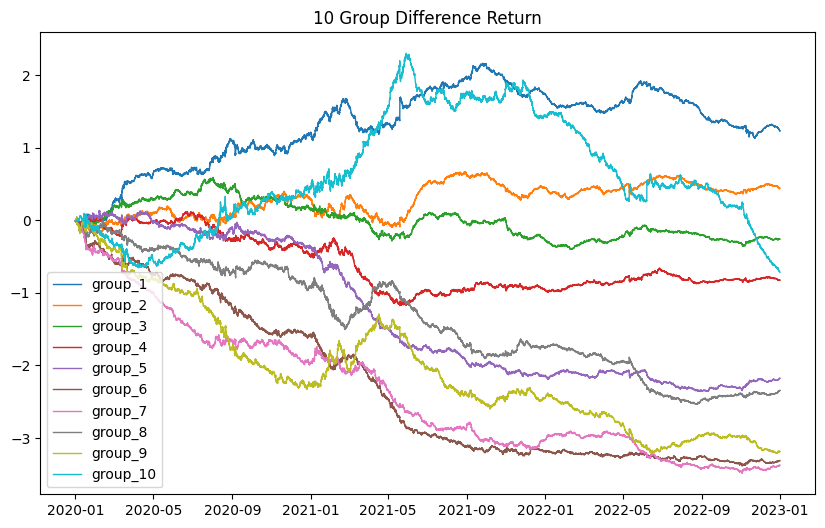

group_1: 
ann_return = 1.4049  sharpe = 1.2243  maxdd = 0.4904  calmar_ratio = 2.8645  

group_2: 
ann_return = 1.1431  sharpe = 0.9994  maxdd = 0.6681  calmar_ratio = 1.7111  

group_3: 
ann_return = 0.9088  sharpe = 0.8174  maxdd = 0.5171  calmar_ratio = 1.7575  

group_4: 
ann_return = 0.7206  sharpe = 0.6467  maxdd = 0.7122  calmar_ratio = 1.0117  

group_5: 
ann_return = 0.2712  sharpe = 0.2412  maxdd = 0.6527  calmar_ratio = 0.4154  

group_6: 
ann_return = -0.1069  sharpe = -0.0949  maxdd = 0.9676  calmar_ratio = -0.1105  

group_7: 
ann_return = -0.128  sharpe = -0.1139  maxdd = 1.0324  calmar_ratio = -0.124  

group_8: 
ann_return = 0.2143  sharpe = 0.1859  maxdd = 0.7732  calmar_ratio = 0.2772  

group_9: 
ann_return = -0.0664  sharpe = -0.0562  maxdd = 1.2968  calmar_ratio = -0.0512  

group_10: 
ann_return = 0.7571  sharpe = 0.617  maxdd = 0.8393  calmar_ratio = 0.9021  

-----------------------------------------
group_difference_1: 
ann_return = 0.4093  sharpe = 1.0771  ma

In [5]:
factors = df.select(['open_time', 'symbol', 'CCI'])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()